# Escalator Binary Classification Project - Ivy Zhou

## Introduction

In this project, we intend to build a model that can recognize whether there may be any dangerous objects in close proximity to the escalator. 

Dangerous objects include items such as wheeled or large pieces of luggage, strollers and wheelchairs.

This is helpful as many injuries can be prevented as we can train computers to warn people before they put themselves in an unsafe situation.

## Binary Classification

Binary Classification is the process of classifying items into one of two groups.

In our case, all images in the dataset were labeled as either 'Safe' or 'Unsafe.'

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

#### Safe 

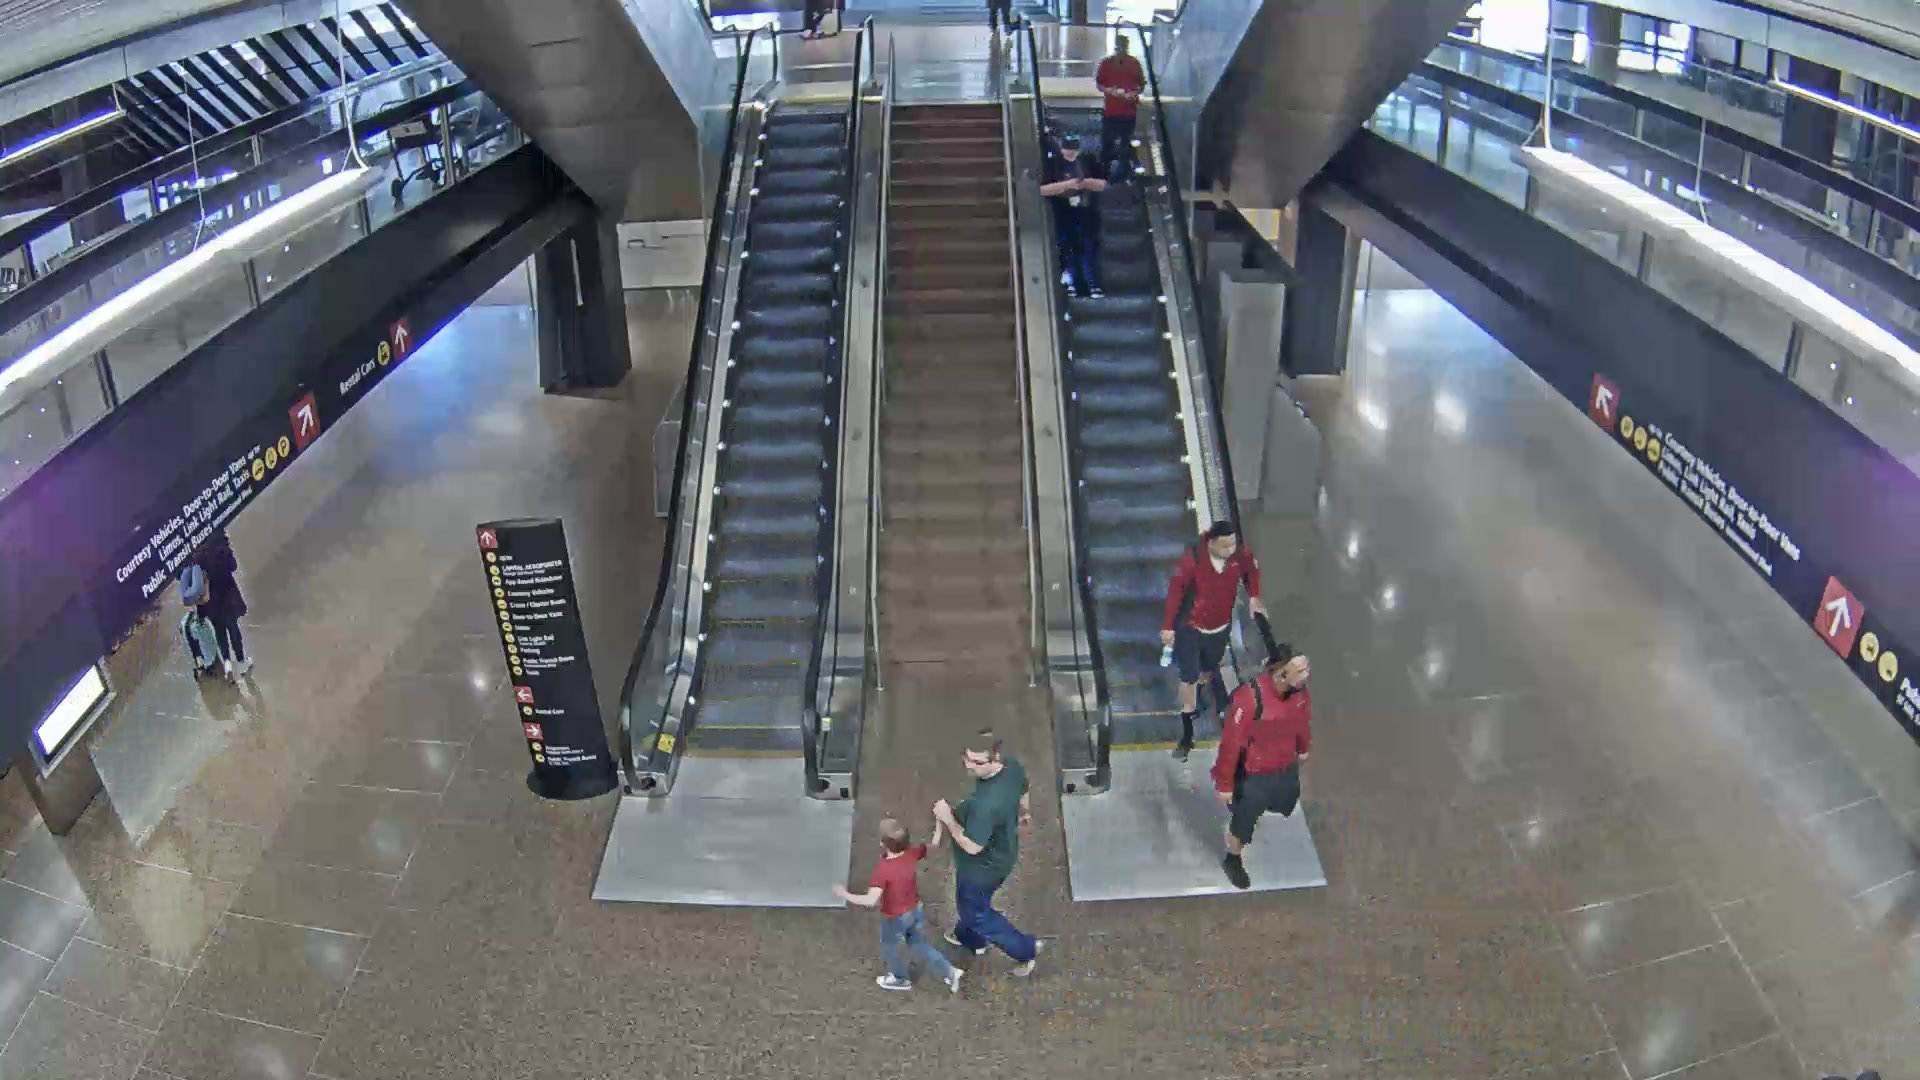

In [4]:
Image(filename = r"Downloads/Sorted Escalators/Safe/escalator_300.jpg", width=600, height=600)

Since there are no dangerous objects in close proximity to the escalator, this image is classified as 'Safe.'

#### Unsafe

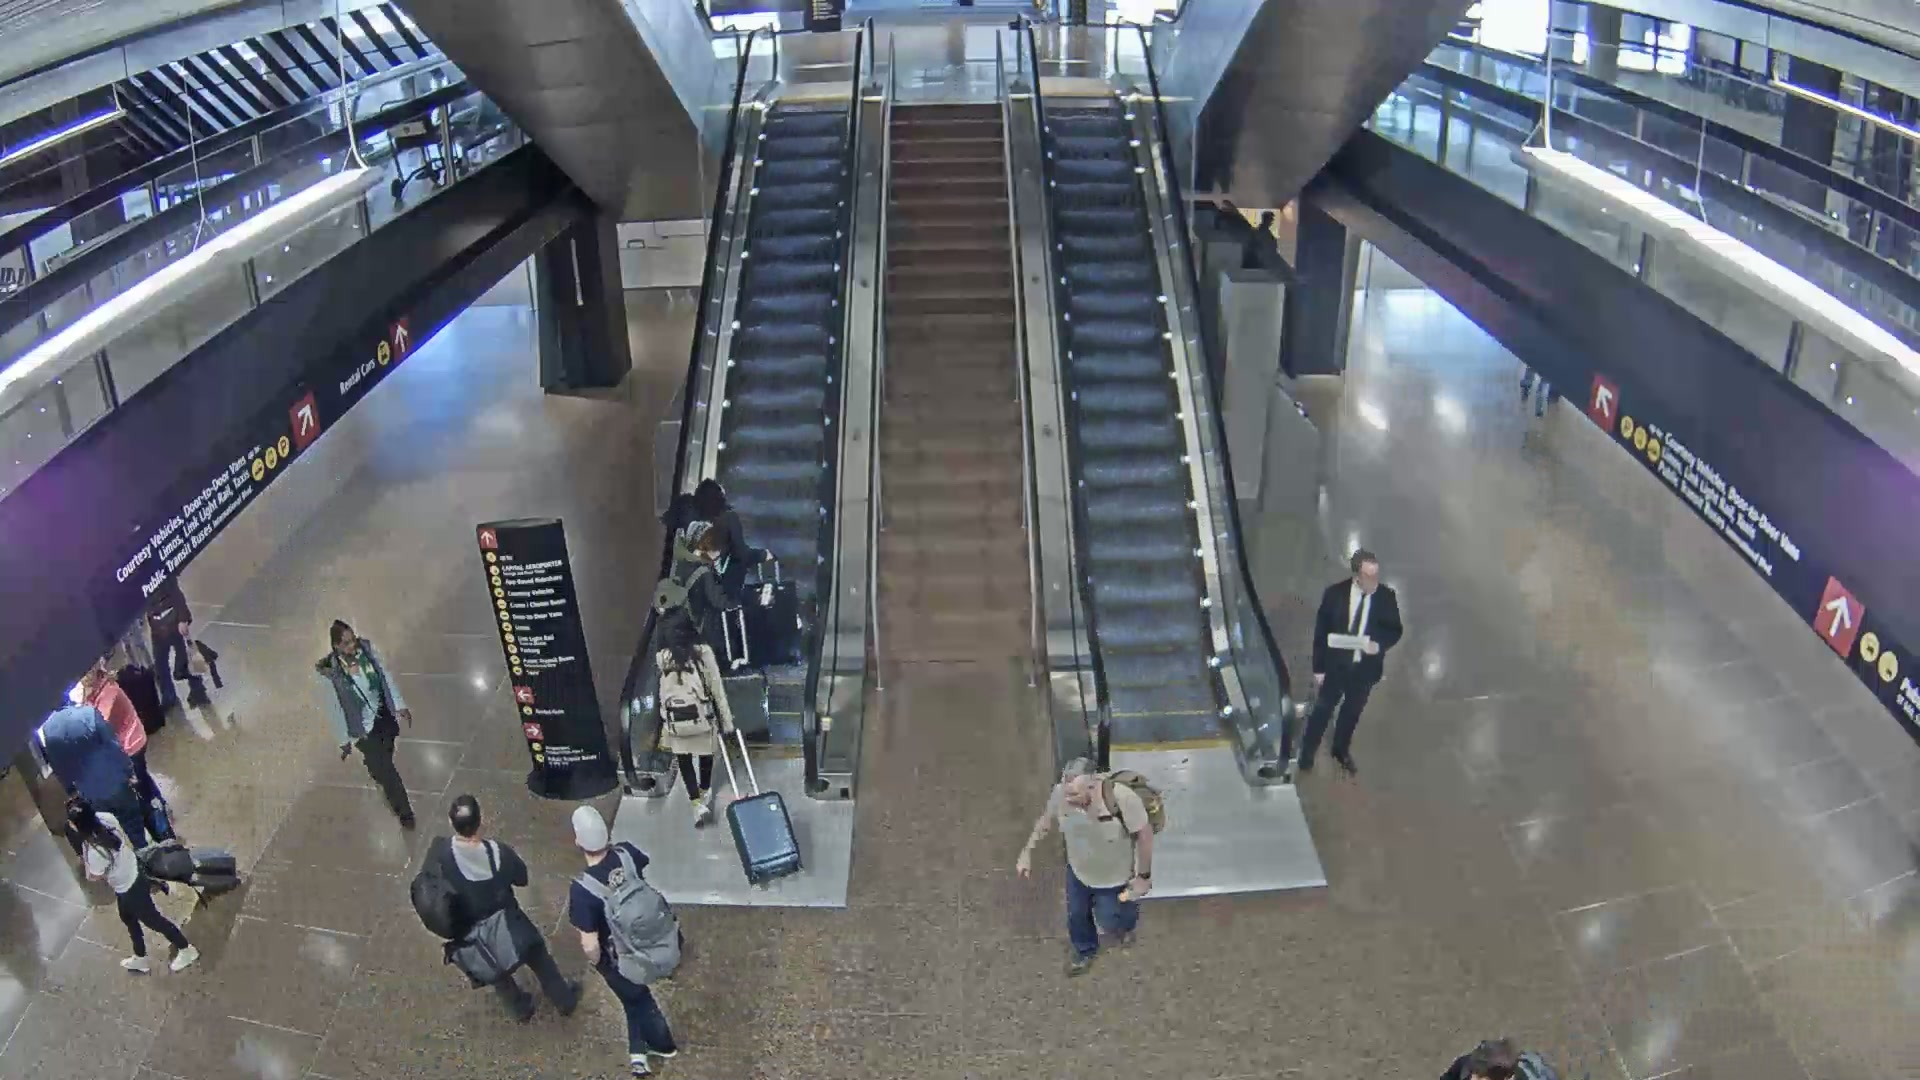

In [5]:
Image(filename = r"Downloads/Sorted Escalators/Unsafe/escalator_390.jpg", width=600, height=600)

Since there are pieces of luggage being pulled onto the escalator, this image is classified as 'Unsafe.'

### Main Libraries
- keras
- matplotlib
- numpy
- scikit-learn

They contain already written code and functions.

### Transfer Learning
Since there are many models that have been previously trained on millions of images for large-scale classification projects, using transfer learning may be more convenient and can speed up the training process. 

Utilizing a pretrained model with built-in layers to conduct transfer learning serves as a common approach for classification projects taking in image data as input.

### ResNet-50

In this specific case, Keras was used to load the pretrained ResNet-50 model with "imagenet" weights as a base for our model.

ResNet-50 has been trained on over a million images and can be used for large-scale classification projects.

It can be retrained for new classification projects.

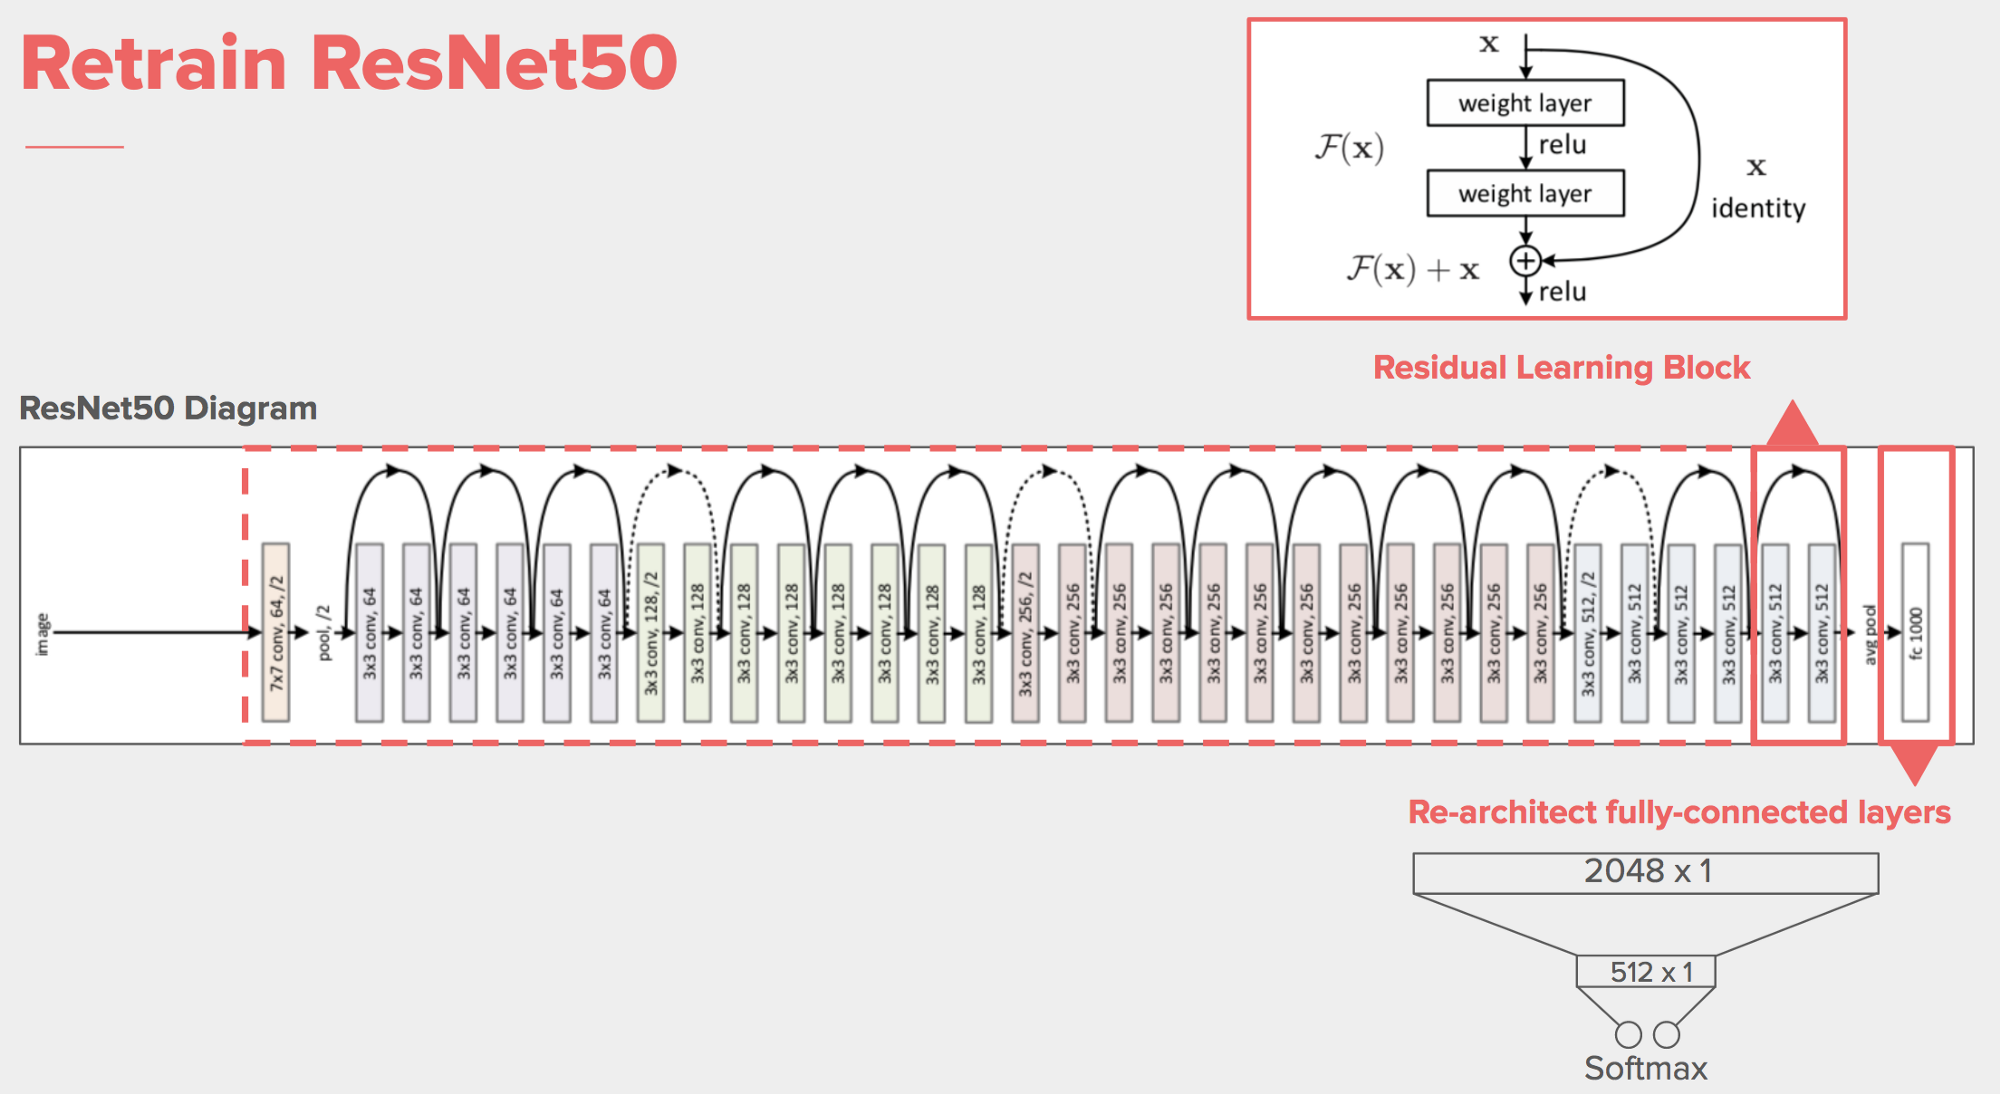

In [16]:
Image(filename = r"Pictures/resnet-50.PNG", width=600, height=600)

#### Options:
- Use ResNet-50 as a base and re-train added layers
- Retrain the entire ResNet-50 model

I did both, but did not receive strong enough results for the 2nd option, so I will discuss the 1st one.
### Building the Model 

To build the model, I freezed the layers that weren't going to be trained and added layers to complete it.

    base_model = ResNet50(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    x = base_model.output

    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(2, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

### Cleaning the Dataset

Before preprocessing the images and converting them into an array of numbers that can be trained, the dataset needs some slight adjustments. In order to resolve the issue of asymmetric data and incorporate balance into the sample, random images from the larger ‘Safe’ class were selected using a random number generator to match the size of the smaller ‘Unsafe’ class. Although this significantly reduced the size of the overall dataset, it is critical that both classes are fairly represented to prevent the possibility of yielding a misleading accuracy rate.

656 'Safe' Images + 656 'Unsafe' Images = 1312 Total Images

### Loading and Converting Dataset

After cleaning the data, the images are loaded, resized into a shape of (250, 500, 3) and converted into arrays.

The images are cropped using numpy slicing.

    cropped_img = img[12:236, 134:358]
    
The final shape of the image was (224, 224, 3).

##### Original

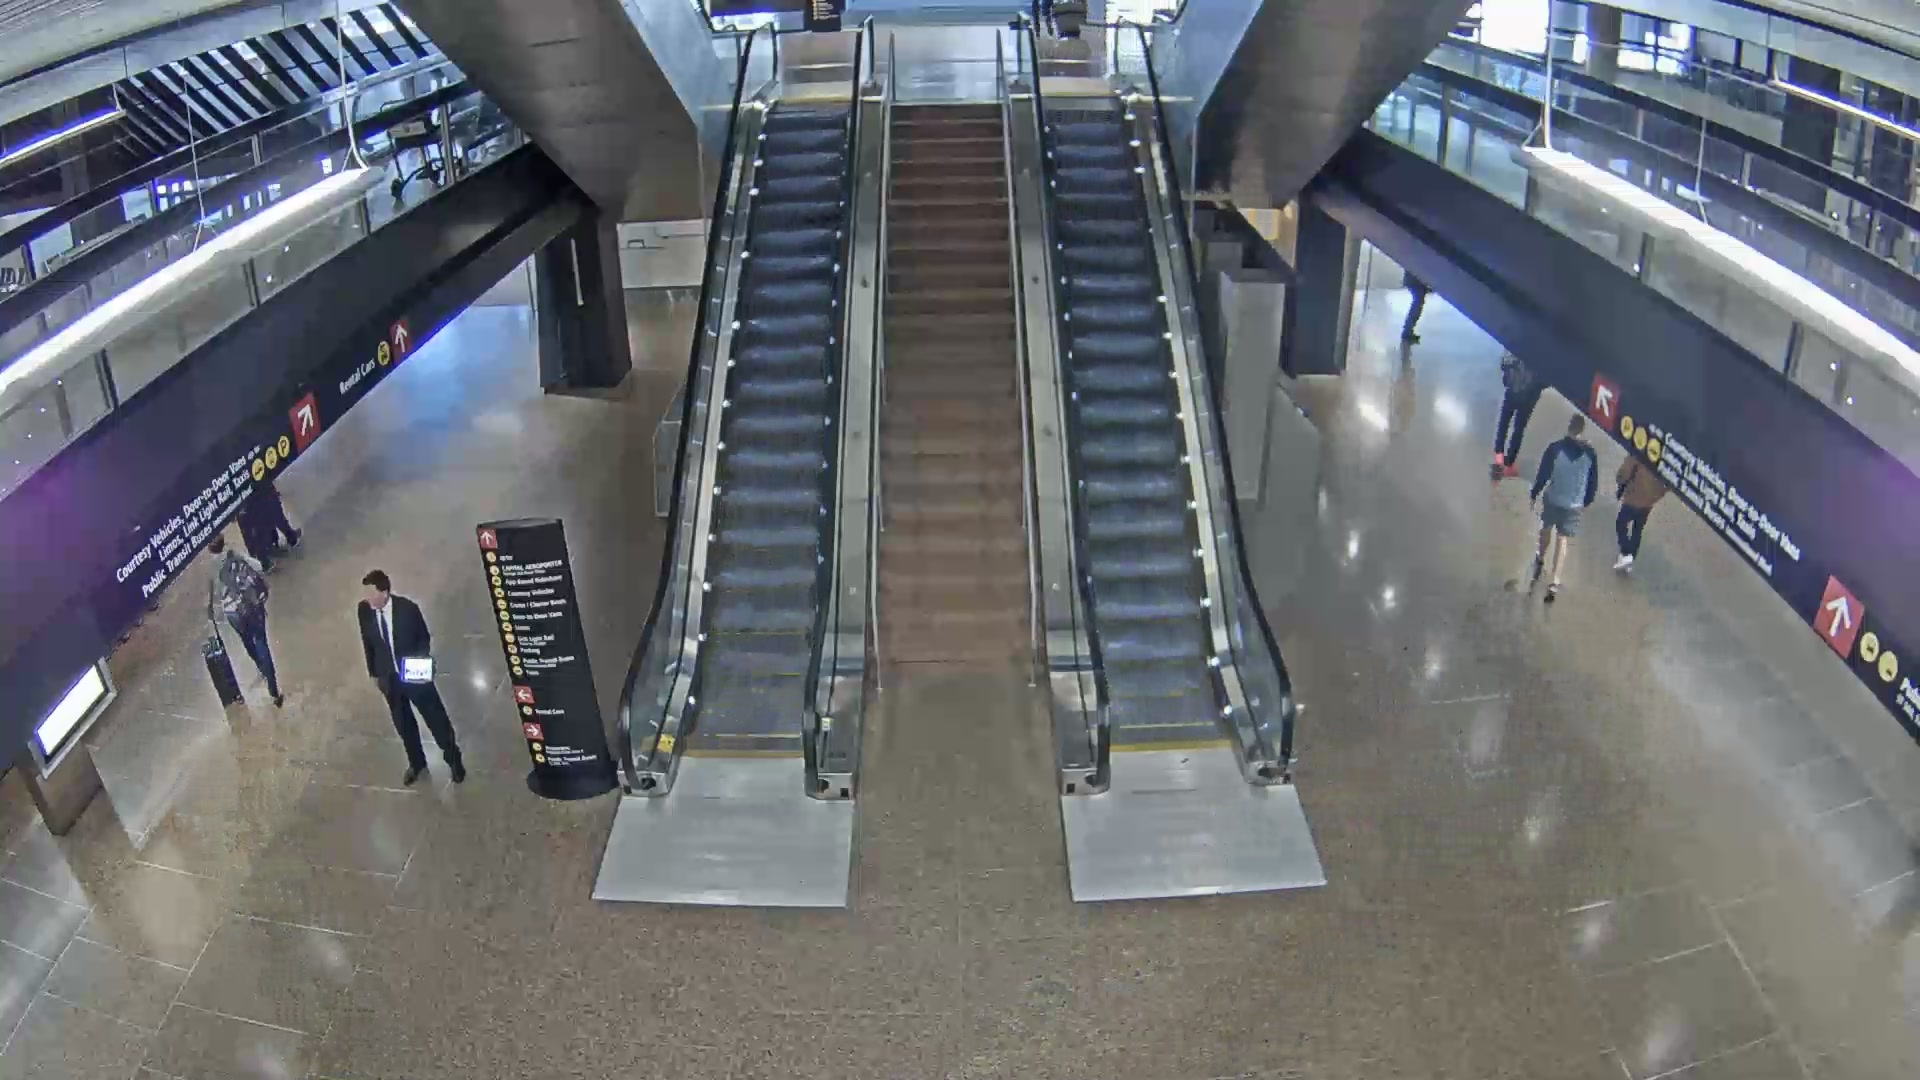

In [17]:
Image(filename = r"Downloads/Sorted Escalators/Safe/escalator_234.jpg", width=600, height=600)

##### Cropped

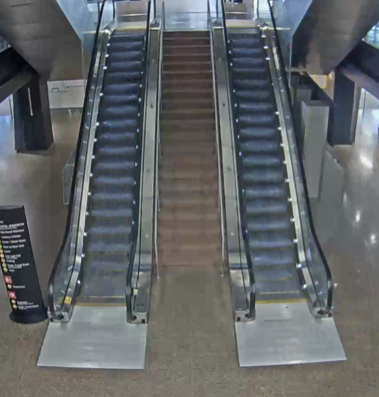

In [20]:
Image(filename = r"Pictures/after crop.PNG", width=300, height=300)

- Enhance focus on area of interest
- Remove any distracting background activity

## Split Training and Validation Set
The images are split into training and validation sets at a ratio of 9:1 using scikit-learn's train_test_split.

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

1180 Training + 132 Validation = 1312 Total Images

## Training the Model
Training the model with 5 epochs.

    model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)

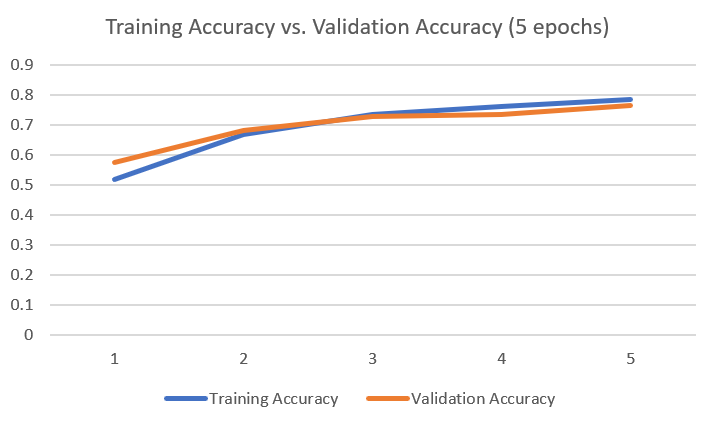

In [9]:
Image(filename = r"Pictures/graph - 5.PNG", width=600, height=600)

Training Accuracy: Accuracy when model is applied on the training set.

Validation Accuracy:  Accuracy when model is applied on the validation set.

You can see that the model is not overfitting or underfitting.
## Making Predictions

Using 10 random new images to test whether the model is able to correctly classify the image as safe or unsafe.
These test images have also been cropped to match the training and validation set.

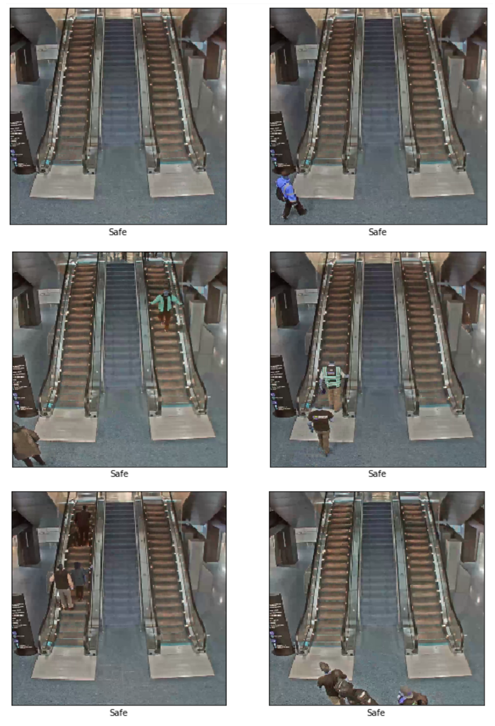

In [10]:
Image(filename = r"Pictures/final proj - 5.1.PNG", width=600, height=600)

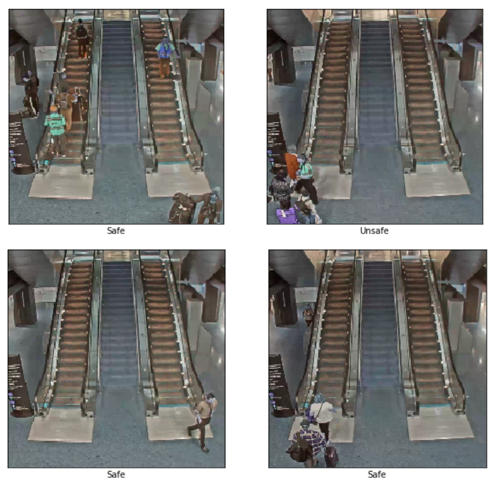

In [11]:
Image(filename = r"Pictures/final proj - 5.2.PNG", width=600, height=600)

60% (6/10) of the images have been correctly classified. Although it's better than a coin flip, the model definitely needs improvement.

## Training the Model

To see if a higher accuracy could be achieved, I ran more epochs.
    
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

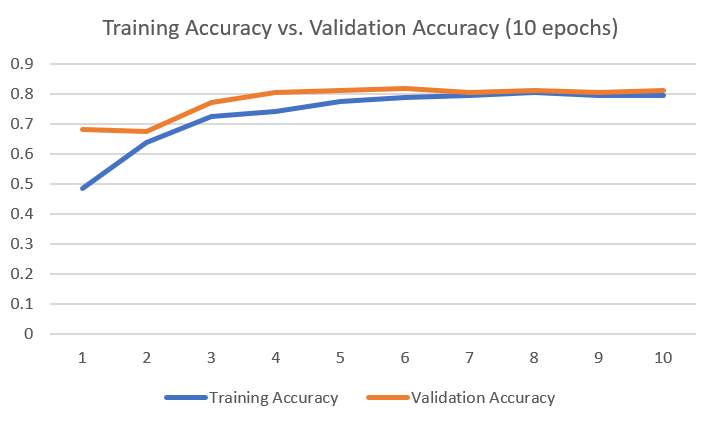

In [12]:
Image(filename = r"Pictures/graph - 10.PNG", width=600, height=600)

The model stabilizes at a validation accuracy of 81%.

## Making Predictions

Using the same ten images to test whether the model has improved.

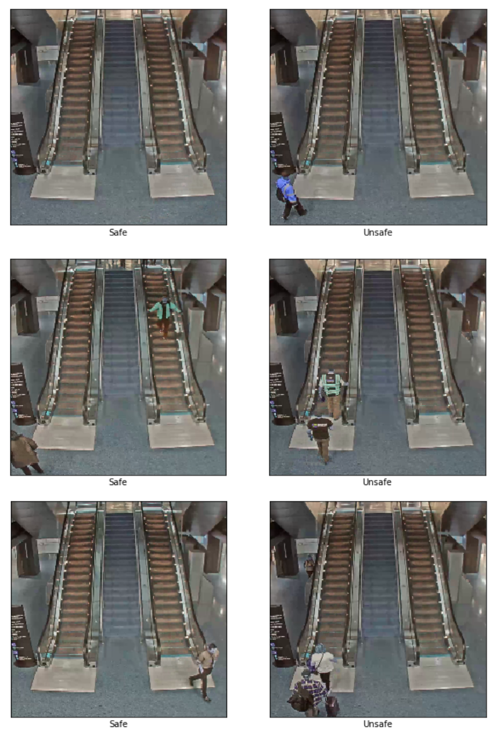

In [14]:
Image(filename = r"Pictures/final proj 10.1.PNG", width=600, height=600)

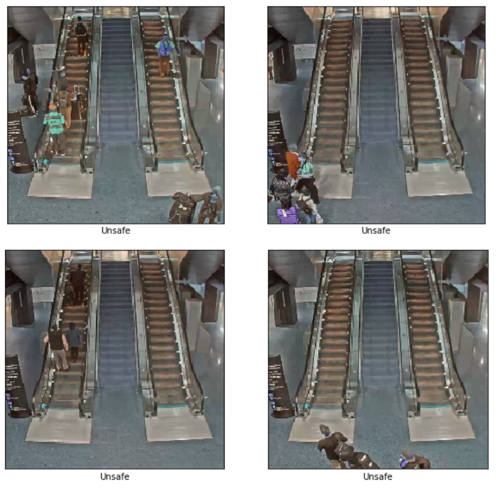

In [15]:
Image(filename = r"Pictures/final proj 10.2.PNG", width=600, height=600)

80% (8/10) of the images have been correctly classified.

## Improving Accuracy
Although this model is not ideal, the accuracy can certainly be further improved by:
- Running more iterations
- Implementing a larger dataset
- Changing the parameters
- Augmenting the data (stretch, resize, add filters)

## Takeaways

It is difficult building a strong and consistent model. Whenever I code, I expect my program to run a specific way, but with machine learning, I never know what results to expect. 

I definitely have learned a lot this summer that I will take with me as I enter college and the rest of my career.

## References
- https://www.tensorflow.org/tutorials/keras/basic_classification
- https://github.com/keras-team/keras/issues/9214
- https://www.analyticsvidhya.com/blog/2019/04/build-first-multi-label-image-classification-model-python/
- https://mc.ai/categorize-airbnb-listing-photos-with-large-scale-deep-learning/